In [1]:
from sklearn import preprocessing
import pandas as pd

def preprocess(data, features):

	import pandas as pd
	import numpy as np
	np.random.seed(10)

	N = 3
	print(data.shape)
	row_reduce = data
	for i in range (0, N):
		remove_n = row_reduce.shape[0] // 2
		drop_indices = np.random.choice(row_reduce.index, remove_n, replace=False)
		row_reduce = row_reduce.drop(drop_indices)

	df = row_reduce

	df = df.astype({'DATA[0]': 'str',
					'DATA[1]': 'str',
					'DATA[2]': 'str',
					'DATA[3]': 'str',
					'DATA[4]': 'str',
					'DATA[5]': 'str',
					'DATA[6]': 'str',
					'DATA[7]': 'str',
					'Flag': 'str'})

	print("Preprocessing Y...")
	Y = df.iloc[:, 8]
	le = preprocessing.LabelEncoder()
	Y = le.fit_transform(Y)

	# pd.DataFrame(Y).to_csv("./attack_labels.csv")

	print("Preprocessing X...")
	X = df.iloc[:, 0: 8]
	print(X.shape)


	# LabelEncoder object and fit it to each feature
	print("Encoding X...")
	le = preprocessing.LabelEncoder()
	X = X.apply(le.fit_transform)
	print(X.shape)

	row_reduce = None
	data = None
	df = None

	# OneHotEncoder object, and fit it to all data
	print("One-Hot Encoding X...")
	enc = preprocessing.OneHotEncoder()
	enc.fit(X)
	X = enc.transform(X).toarray()
	print(X.shape)


	from sklearn import datasets, cluster

	print("Performing Feature Agglomeration...")
	agglo = cluster.FeatureAgglomeration(n_clusters = features)
	agglo.fit(X)
	X_reduced = agglo.transform(X)
	print(X_reduced.shape)

	X = None

	return Y, X_reduced

In [2]:
features = 16

In [3]:
df = pd.read_csv('./attacks.csv',index_col=0)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
Y, X = preprocess(df, features)

(5378578, 9)
Preprocessing Y...
Preprocessing X...
(672323, 8)
Encoding X...
(672323, 8)
One-Hot Encoding X...


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(672323, 2052)
Performing Feature Agglomeration...
(672323, 16)


In [5]:
Y = pd.DataFrame(Y)
X = pd.DataFrame(X)

In [6]:
# print("Concat-ing files and converting to CSV...")
# data = pd.concat([Y, X])

Concat-ing files and converting to CSV...


In [7]:
# data.to_csv('./attack_' + str(features) + 'features.csv', index=None,
# 			  header=True)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [10]:
from sklearn.svm import SVC
svclassifier = SVC(gamma='scale')
svclassifier.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
y_pred = svclassifier.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
    print("Accuracy : \n", accuracy_score(y_test, y_pred) * 100)
    print("Report : \n", classification_report(y_test, y_pred))

In [16]:
cal_accuracy(y_test, y_pred)

Confusion Matrix: 
 [[14797     0     0     0     0]
 [    0 12412     0    61     0]
 [    0     0 14852     0     0]
 [ 2098     0     0 73849     0]
 [    0     0     0     0 16396]]
Accuracy : 
 98.39437771910906
Report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     14797
           1       1.00      1.00      1.00     12473
           2       1.00      1.00      1.00     14852
           3       1.00      0.97      0.99     75947
           4       1.00      1.00      1.00     16396

   micro avg       0.98      0.98      0.98    134465
   macro avg       0.97      0.99      0.98    134465
weighted avg       0.99      0.98      0.98    134465



In [40]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train.values.ravel())
y_pred_rf = clf_rf.predict(X_test)
cal_accuracy(y_test, y_pred_rf)

Confusion Matrix: 
 [[14797     0     0     0     0]
 [    0 12424     0    49     0]
 [    0     0 14852     0     0]
 [ 2098     3     0 73846     0]
 [    0     0     0     0 16396]]
Accuracy : 
 98.4010709106459
Report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     14797
           1       1.00      1.00      1.00     12473
           2       1.00      1.00      1.00     14852
           3       1.00      0.97      0.99     75947
           4       1.00      1.00      1.00     16396

   micro avg       0.98      0.98      0.98    134465
   macro avg       0.97      0.99      0.98    134465
weighted avg       0.99      0.98      0.98    134465



In [27]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
cal_accuracy(y_test, y_pred_dt)

Confusion Matrix: 
 [[14797     0     0     0     0]
 [    0 12419     0    54     0]
 [    0     0 14852     0     0]
 [ 2098     2     0 73847     0]
 [    0     0     0     0 16396]]
Accuracy : 
 98.39809615885174
Report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     14797
           1       1.00      1.00      1.00     12473
           2       1.00      1.00      1.00     14852
           3       1.00      0.97      0.99     75947
           4       1.00      1.00      1.00     16396

   micro avg       0.98      0.98      0.98    134465
   macro avg       0.97      0.99      0.98    134465
weighted avg       0.99      0.98      0.98    134465



In [39]:
from sklearn.naive_bayes import MultinomialNB
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train.values.ravel())
y_pred_mnb = clf_mnb.predict(X_test)
cal_accuracy(y_test, y_pred_mnb)

Confusion Matrix: 
 [[    0     0     0 14797     0]
 [    0     1     0 12469     3]
 [    0     0 14794    58     0]
 [    0     0     0 75945     2]
 [    0     0     0     0 16396]]
Accuracy : 
 79.67575205443795
Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     14797
           1       1.00      0.00      0.00     12473
           2       1.00      1.00      1.00     14852
           3       0.74      1.00      0.85     75947
           4       1.00      1.00      1.00     16396

   micro avg       0.80      0.80      0.80    134465
   macro avg       0.75      0.60      0.57    134465
weighted avg       0.74      0.80      0.71    134465



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
import numpy as np
from sklearn.model_selection import learning_curve

param_range = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]

train_sizes, train_scores_svm, valid_scores_svm = learning_curve(SVC(gamma = 'auto'),
                                                                 X_test, y_test.values.ravel(), 
                                                                 train_sizes= param_range, 
                                                                 cv=5)

train_mean_svm = np.mean(train_scores_svm, axis=1)
train_std_svm = np.std(train_scores_svm, axis=1)
test_mean_svm = np.mean(valid_scores_svm, axis=1)
test_std_svm = np.std(valid_scores_svm, axis=1)

In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import learning_curve
train_sizes, train_scores_rf, valid_scores_rf = learning_curve(RandomForestClassifier(),
                                                                 X_test, y_test.values.ravel(), 
                                                                 train_sizes= param_range, 
                                                                 cv=5)

train_mean_rf = np.mean(train_scores_rf, axis=1)
train_std_rf = np.std(train_scores_rf, axis=1)
test_mean_rf = np.mean(valid_scores_rf, axis=1)
test_std_rf = np.std(valid_scores_rf, axis=1)

In [32]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores_dt, valid_scores_dt = learning_curve(DecisionTreeClassifier(),
                                                                 X_test, y_test.values.ravel(), 
                                                                 train_sizes= param_range, 
                                                                 cv=5)

train_mean_dt = np.mean(train_scores_dt, axis=1)
train_std_dt = np.std(train_scores_dt, axis=1)
test_mean_dt = np.mean(valid_scores_dt, axis=1)
test_std_dt = np.std(valid_scores_dt, axis=1)

In [33]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores_mnb, valid_scores_mnb = learning_curve(MultinomialNB(),
                                                                 X_test, y_test.values.ravel(), 
                                                                 train_sizes= param_range, 
                                                                 cv=5)

train_mean_mnb = np.mean(train_scores_mnb, axis=1)
train_std_mnb = np.std(train_scores_mnb, axis=1)
test_mean_mnb = np.mean(valid_scores_mnb, axis=1)
test_std_mnb = np.std(valid_scores_mnb, axis=1)

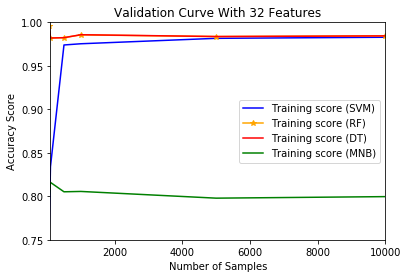

In [41]:
from numpy import *
import math
import matplotlib.pyplot as plt

param_range = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]

plt.plot(param_range, train_mean_svm, label="Training score (SVM)", color="blue")
# plt.plot(param_range, test_mean_svm, label="Cross-validation score (SVM)", color="blue", marker = "*" )

plt.plot(param_range, train_mean_rf, label="Training score (RF)", color="orange", marker = "*")
# plt.plot(param_range, test_mean_rf, label="Cross-validation score (RF)", color="purple")

plt.plot(param_range, train_mean_dt, label="Training score (DT)", color="red")
# plt.plot(param_range, test_mean_dt, label="Cross-validation score (DT)", color="green")

plt.plot(param_range, train_mean_mnb, label="Training score (MNB)", color="green")
# plt.plot(param_range, test_mean_mnb, label="Cross-validation score (MNB)", color="green")

# Create plot
plt.title("Validation Curve With 32 Features")
plt.xlabel("Number of Samples")
plt.ylabel("Accuracy Score")
plt.axis([100, 10000, 0.75, 1.0])
plt.legend(loc="best")
plt.show()